In [0]:
import os
os.chdir('/content/drive/My Drive/kaggle_study/dacon_star')

In [3]:
import pandas as pd
train =pd.read_pickle('train.pkl')
print(train.shape)
train.head()

(67091776, 7)


,game_id,winner,time,player,species,event,event_contents
0,0.0,1.0,0,0.0,0.0,0.0,"at (145.25, 21.5078125)"
1,0.0,1.0,0,1.0,0.0,0.0,"at (22.75, 147.0078125)"
2,0.0,1.0,0,0.0,0.0,1.0,['OrbitalCommand [3080001]']
3,0.0,1.0,0,0.0,0.0,2.0,(1360) - TrainSCV
4,0.0,1.0,0,0.0,0.0,0.0,"at (142.99609375, 24.50390625)"


In [5]:
x_train = pd.read_csv('data/xy_train.csv')
print(x_train.shape)
x_train.head()

(38872, 35)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,game_id,P0_species,P0_Camera,P0_Selection,P0_Ability,P0_Right Click,P0_SetControlGroup,P0_GetControlGroup,P0_AddToControlGroup,P0_ControlGroup,P1_species,P1_Camera,P1_Selection,P1_Ability,P1_Right Click,P1_SetControlGroup,P1_GetControlGroup,P1_AddToControlGroup,P1_ControlGroup,delta_Camera,delta_Selection,delta_Ability,delta_Right Click,delta_SetControlGroup,delta_GetControlGroup,delta_AddToControlGroup,delta_ControlGroup,winner,p0_wm,p1_wm,P1_p_selection,P0_p_selection
0,0,0,0,0.0,0.0,444.0,50.0,34.0,35.0,3.0,24.0,2.0,0.0,0.0,425.0,57.0,34.0,28.0,1.0,3.0,0.0,0.0,19.0,-7.0,0.0,7.0,2.0,21.0,2.0,0.0,1.0,9,6,53,45
1,1,1,1,1.0,1.0,627.0,186.0,77.0,160.0,10.0,162.0,1.0,0.0,0.0,858.0,116.0,67.0,131.0,8.0,31.0,0.0,0.0,-231.0,70.0,10.0,29.0,2.0,131.0,1.0,0.0,1.0,22,17,114,177
2,2,2,2,2.0,1.0,413.0,90.0,69.0,160.0,14.0,99.0,6.0,0.0,2.0,725.0,232.0,85.0,204.0,9.0,109.0,5.0,2.0,-312.0,-142.0,-16.0,-44.0,5.0,-10.0,1.0,-2.0,0.0,19,23,206,86
3,3,3,3,3.0,0.0,713.0,180.0,82.0,276.0,6.0,132.0,0.0,0.0,1.0,388.0,148.0,89.0,268.0,19.0,710.0,0.0,0.0,325.0,32.0,-7.0,8.0,-13.0,-578.0,0.0,0.0,0.0,7,24,144,171
4,4,4,4,4.0,0.0,430.0,67.0,57.0,177.0,10.0,224.0,1.0,0.0,2.0,272.0,126.0,36.0,106.0,8.0,99.0,4.0,0.0,158.0,-59.0,21.0,71.0,2.0,125.0,-3.0,0.0,0.0,14,13,118,64


## Ablilty 개수 확인

In [0]:
uni_ec = train.loc[train['event'] == 2,'event_contents'].unique()

In [0]:
ec_vc = train.loc[train['event'] == 2,'event_contents'].value_counts()

In [0]:
len(uni_ec)

906693

In [0]:
uni_ec[:10]

array(['(1360) - TrainSCV',
       '(1021) - BuildSupplyDepot; Location: (135.0, 42.0, 49119)',
       '(480) - Stop',
       '(1021) - BuildSupplyDepot; Location: (28.0, 148.0, 49127)',
       '(1022) - BuildRefinery; Target: CreepOnlyBlocker4x4 [024C0001]; Location: (27.5, 154.5, 49120)',
       '(1023) - BuildBarracks; Location: (135.5, 39.5, 49133)',
       '(1022) - BuildRefinery; Target: CreepOnlyBlocker4x4 [01B00001]; Location: (150.5, 27.5, 49120)',
       '(1023) - BuildBarracks; Location: (28.5, 144.5, 49127)',
       '(1020) - BuildCommandCenter; Location: (147.5, 53.5, 41187)',
       '(1021) - BuildSupplyDepot; Location: (24.0, 142.0, 49127)'],
      dtype=object)

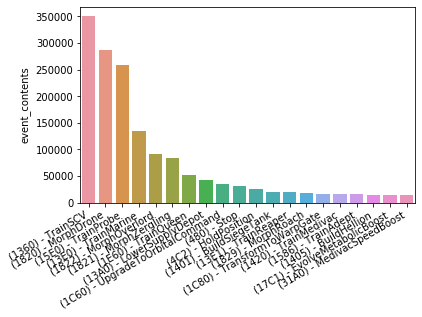

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec


fig,ax1 = plt.subplots()

sns.barplot(x= ec_vc[:20].keys(),y=ec_vc[:20],ax=ax1)
# plt.legend(loc=2, bbox_to_anchor=(1.1, 1), ncol=1)

fig.autofmt_xdate()
# fig.tight_layout()
plt.show()

In [0]:
ec_vc[:30].keys

<bound method Series.keys of (1360) - TrainSCV                   350376
(1820) - MorphDrone                 287254
(15E0) - TrainProbe                 258765
(13E0) - TrainMarine                134801
(1822) - MorphOverlord               90700
(1821) - MorphZergling               83416
(1E60) - TrainQueen                  51130
(13A0) - LowerSupplyDepot            42761
(1C60) - UpgradeToOrbitalCommand     34531
(480) - Stop                         30424
(4C2) - HoldPosition                 24828
(1401) - BuildSiegeTank              19363
(13E1) - TrainReaper                 19301
(1829) - MorphRoach                  18200
(1C80) - TransformToWarpGate         16109
(1420) - TrainMedivac                15937
(1586) - TrainAdept                  15566
(1405) - BuildHellion                15001
(17C1) - EvolveMetabolicBoost        14638
(31A0) - MedivacSpeedBoost           14504
(13C0) - RaiseSupplyDepot            14386
(1581) - TrainStalker                14134
(13E3) - TrainMarauder   

## test Ability visualize

In [0]:
t_ec_vc = test.loc[test['event'] == 2,'event_contents'].value_counts()

In [0]:
t_ec_vc.head()

(1360) - TrainSCV         153269
(1820) - MorphDrone       122634
(15E0) - TrainProbe       110138
(13E0) - TrainMarine       58875
(1822) - MorphOverlord     38779
Name: event_contents, dtype: int64

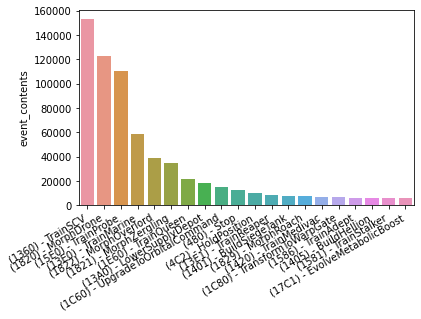

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec


fig,ax1 = plt.subplots()

sns.barplot(x= t_ec_vc[:20].keys(),y=t_ec_vc[:20],ax=ax1)
# plt.legend(loc=2, bbox_to_anchor=(1.1, 1), ncol=1)

fig.autofmt_xdate()
# fig.tight_layout()
plt.show()

## 일꾼 생산량 확인

In [0]:
def species_wm(i,data):
    wm_dict= {0:'1360',1:'15E0',2:'1820'}
    p0_wm= []
    p1_wm = []
    
    sp = data.loc[data['game_id']==i,'species'].groupby(data['player']).unique()
    p0_wm.append(int(data.loc[(data['game_id']==i),'event_contents'].str.contains('{}'.format(str(wm_dict[sp[0][0]]))).groupby(train['player']).sum()[0]))
    p1_wm.append(int(data.loc[(data['game_id']==i),'event_contents'].str.contains('{}'.format(str(wm_dict[sp[1][0]]))).groupby(train['player']).sum()[1]))
    
    
    return p0_wm,p1_wm



In [0]:
import threading
import concurrent.futures
import time
p0_wm,p1_wm = [],[]
t_start = time.time()
# t = [threading.Thread(target=species_wm, args=(i)) for i in range(len(train['game_id'].unique()))]

with concurrent.futures.ThreadPoolExecutor() as executor:
    t= [executor.submit(species_wm,i,test) for i in test['game_id'].unique()]


for i in t:
    a,b = i.result()
    p0_wm +=a
    p1_wm +=b

x_t['p0_wm'] = p0_wm
x_t['p1_wm'] = p1_wm

x_t.to_csv('x_test2.csv')
time.time() - t_start

633.233647108078

In [0]:
p1_wm

[6, 17, 23, 24, 13, 15, 16, 22, 11, 7]

In [0]:
sp = train.loc[train['game_id']==3727,'species'].groupby(train['player']).unique()

In [0]:
sp = test.loc[test['game_id']==38873.0,'species'].groupby(test['player']).unique()

In [0]:
sp

player
0.0    [2.0]
1.0    [0.0]
Name: species, dtype: object

In [0]:
test.loc[test['game_id']==38873.0,'event_contents'].str.contains('15e0').groupby(test['player']).sum()[0]

NameError: ignored

In [0]:
train.loc[train['game_id']==3623,'event_contents'].str.contains('15E0').sum()

1

In [0]:
train.loc[(train['event']==1)&(train['player']==1),'event_contents'].str.contains('1820').sum()

0

In [0]:
train.loc[(train['game_id']==3727) & (train['event_contents'].str.contains('1360'))]

,game_id,winner,time,player,species,event,event_contents
6423829,3727.0,0.0,0,0.0,2.0,2.0,(1820) - MorphDrone


## 일꾼 생산량이 승률에 영향을 미치는지

In [13]:
a= x_train.loc[x_train['p0_wm'] < x_train['p1_wm'],'winner']
print(len(a))
a.value_counts()

17668


1.0    10153
0.0     7515
Name: winner, dtype: int64

In [29]:
10153/17668

0.5746547430382613

- 일꾼 생산량이 높은 쪽의 승률이 좋으편

In [0]:
a= x_train['P0_Ability'] - x_train['p0_wm']
b= x_train['P1_Ability'] - x_train['p1_wm']
c= a-b 

In [0]:
x_train['delta_p_Ability'] =c

In [25]:
x_train.loc[x_train['delta_p_Ability']<0,'winner'].value_counts()

1.0    10736
0.0     7907
Name: winner, dtype: int64

In [27]:
10736/(10736+7907)

0.5758729818162313

In [26]:
x_train.loc[x_train['delta_Ability']<0,'winner'].value_counts()

1.0    10904
0.0     7764
Name: winner, dtype: int64

In [28]:
10904/(10904+7764)

0.584101135633169

- ability 컬럼에서 일꾼수를 제거하면 ability에 따른 승률이 감소한다.
- player 1의 승률이 기존 58.4% 에서 57.59%로 감소